## Part A

In [2]:
import numpy as np

# Create D: 100,000 points uniformly distributed between 0.01 and 1000
D = np.linspace(0.01, 1000, 100000)

# Displaying first 10 and last 10 values for reference
print("First 10 values of D:", D[:10])
print("Last 10 values of D:", D[-10:])


First 10 values of D: [0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1 ]
Last 10 values of D: [ 999.91  999.92  999.93  999.94  999.95  999.96  999.97  999.98  999.99
 1000.  ]


In [3]:
n = 100000
a = 0.01
l = 1000
sum_D = (n/2)*(a+l)
mean_D = sum_D/n

In [4]:
mean_D

500.005

In [5]:
np.mean(D)

500.005

In [13]:
def sum_val(D,mean_D):
    diff_D = 0
    for value in D:
        diff_D += (value-mean_D)**2

    return diff_D

resul_diff_D = sum_val(D,mean_D)
var_D = resul_diff_D/n



In [14]:
var_D

83333.333325

In [8]:
np.var(D)

83333.33332500001

## Part B

In [25]:
# # Randomly sample 50 points with replacement from the population D
# sampled_points = np.random.choice(D, 50, replace=True)

def _mean(sampled_points):
    sum_sample = 0
    for i in sampled_points:
        sum_sample += i
    
    return sum_sample/50

def mean_square(sampled_points):

    mean_values = _mean(sampled_points)

    return sum_val(sampled_points,mean_values)


def samples_s1_s2_s3(D):

    sampled_points = np.random.choice(D, 50, replace=True)
    # print()
    # print(sampled_points)
    # print()
    s1 = mean_square(sampled_points)/(51)
    # print(s1)
    s2 = mean_square(sampled_points)/(50)
    s3 = mean_square(sampled_points)/(49)

    return s1,s2,s3



In [42]:
num_iterations = 100000
avg1 = []
avg2 = []
avg3 = []
curr_avg1 = 0
curr_avg2 = 0
curr_avg3 = 0
for i in range(1,num_iterations+1):
    if (i == 1):
        curr_avg1,curr_avg2,curr_avg3 = samples_s1_s2_s3(D)
    else:
        s1,s2,s3 = samples_s1_s2_s3(D)
        curr_avg1 = (curr_avg1*(i-1) + s1)/i
        curr_avg2 = (curr_avg2*(i-1) + s2)/i
        curr_avg3 = (curr_avg3*(i-1) + s3)/i
    avg1.append(curr_avg1)
    avg2.append(curr_avg2)
    avg3.append(curr_avg3)



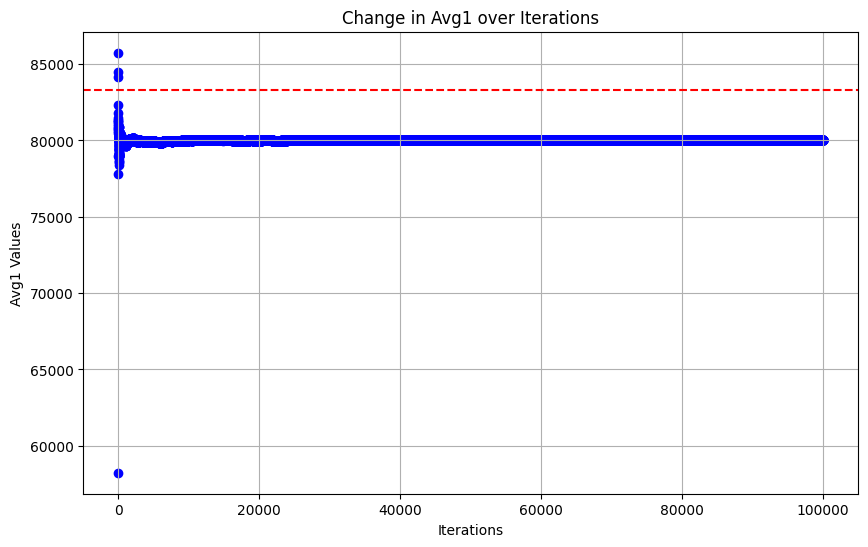

In [43]:
import matplotlib.pyplot as plt

# Assuming avg1 is a numpy array or list containing the values over iterations
# Example: avg1 = [1.2, 2.3, 3.1, 4.5, 5.6]  # Your actual data goes here

# Create x-axis values (number of iterations)
iterations = range(1, len(avg1) + 1)

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(iterations, avg1, color='blue', marker='o')
plt.axhline(y=var_D, color='red', linestyle='--', label=f'Variance = {var_D:.2f}')

# Add labels and title
plt.xlabel('Iterations')
plt.ylabel('Avg1 Values')
plt.title('Change in Avg1 over Iterations')

# Display the plot
plt.grid(True)
plt.show()


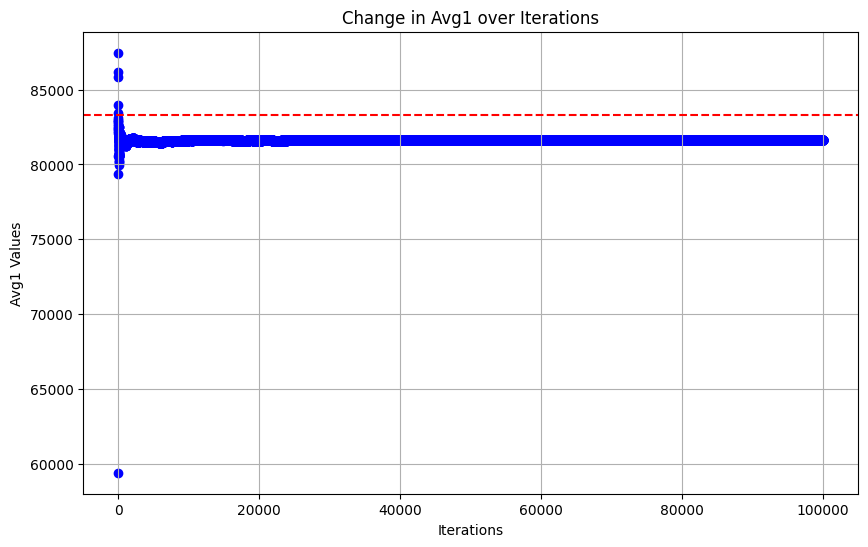

In [44]:
import matplotlib.pyplot as plt

# Assuming avg1 is a numpy array or list containing the values over iterations
# Example: avg1 = [1.2, 2.3, 3.1, 4.5, 5.6]  # Your actual data goes here

# Create x-axis values (number of iterations)
iterations = range(1, len(avg2) + 1)

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(iterations, avg2, color='blue', marker='o')

plt.axhline(y=var_D, color='red', linestyle='--', label=f'Variance = {var_D:.2f}')

# Add labels and title
plt.xlabel('Iterations')
plt.ylabel('Avg1 Values')
plt.title('Change in Avg1 over Iterations')

# Display the plot
plt.grid(True)
plt.show()

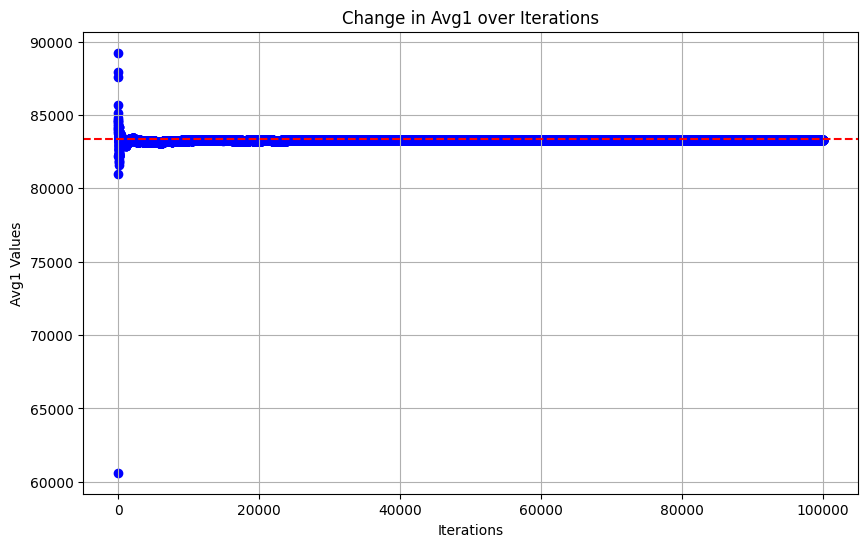

In [45]:
import matplotlib.pyplot as plt

# Assuming avg1 is a numpy array or list containing the values over iterations
# Example: avg1 = [1.2, 2.3, 3.1, 4.5, 5.6]  # Your actual data goes here

# Create x-axis values (number of iterations)
iterations = range(1, len(avg3) + 1)

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(iterations, avg3, color='blue', marker='o')
plt.axhline(y=var_D, color='red', linestyle='--', label=f'Variance = {var_D:.2f}')

# Add labels and title
plt.xlabel('Iterations')
plt.ylabel('Avg1 Values')
plt.title('Change in Avg1 over Iterations')

# Display the plot
plt.grid(True)
plt.show()